In [26]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [27]:
df = pd.read_csv('ThoracicSurgery.csv')

In [28]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [29]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [30]:
# Stats for live and death after 1 yr patients
live = df[df['Death_1yr'] == 0]
death = df[df['Death_1yr'] == 1]

cond = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
        'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]

ld = pd.DataFrame(data={'Attribute': cond, 'Live 1yr Mean': l, 'Death 1yr Mean': d})
ld = ld.set_index('Attribute')

print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(df.Death_1yr)*100))
ld

Death: 69, Live: 385
1 year death: 15.20% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,3.304597,3.195072
FEV1,2.540805,2.383188
Performance,0.774026,0.913043
Pain,0.051948,0.101449
Haemoptysis,0.124675,0.202899
Dyspnoea,0.044156,0.115942
Cough,0.677922,0.797101
Weakness,0.158442,0.246377
Tumor_Size,1.683117,2.014493


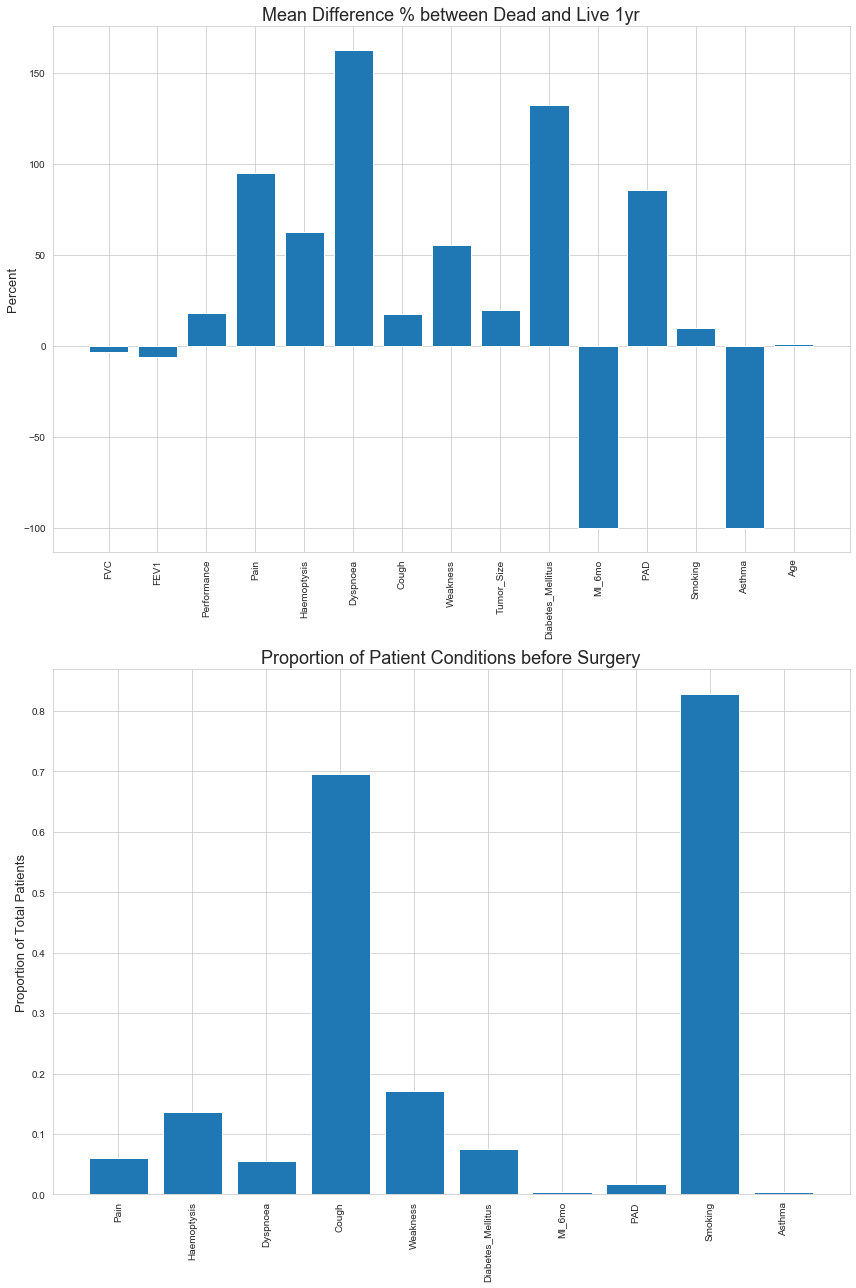

In [31]:
# Percentage difference in means of live vs death patients
d = np.array(d)
l = np.array(l)

p_diff = (d-l)/l*100

fig, axes = plt.subplots(2,1,figsize=(12,18))

axes[0].bar(cond, p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)

# Count plot of true/false condition columns

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma']
tf_sum = [df[col].sum()/454 for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize=18)

plt.tight_layout()

plt.show()

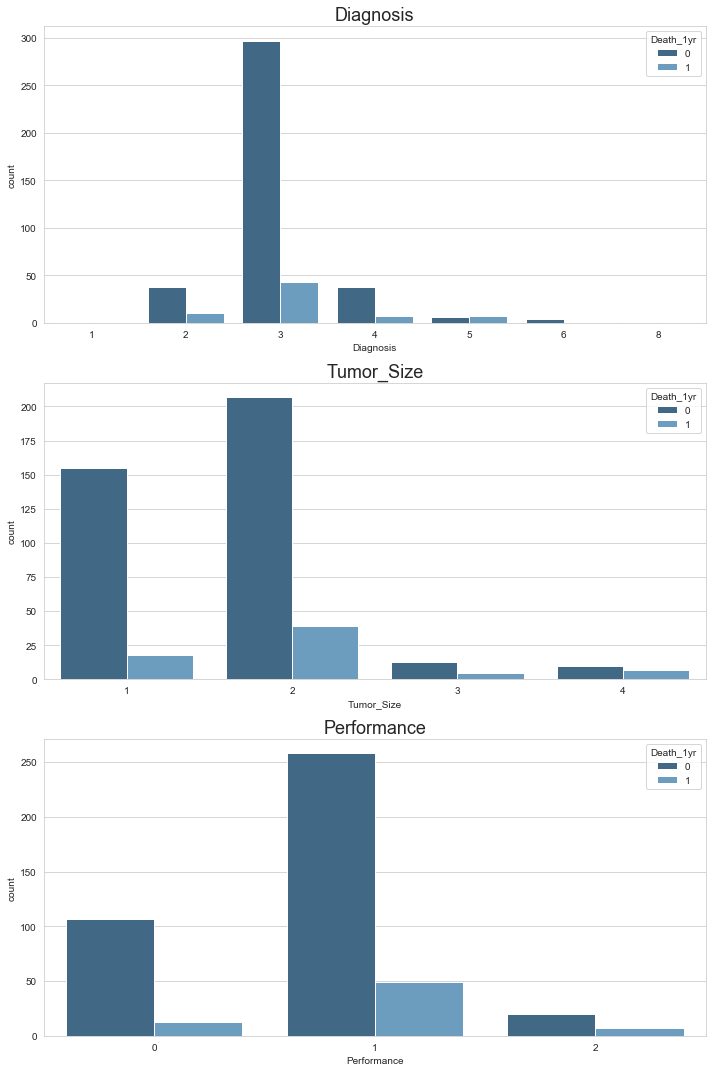

In [32]:
# Count plots of Diagnosis, Tumor_Size, Performance with difference of live and death data

fig, axes = plt.subplots(3,1,figsize=(10,15))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[0]).set_title('Diagnosis', fontsize=18)
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[1]).set_title('Tumor_Size', fontsize=18)
sns.countplot(x='Performance', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[2]).set_title('Performance', fontsize=18)

plt.tight_layout()

In [33]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [34]:
# Hypothesis testing with Permutations of data
condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
             'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
p_val = []

for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(death[c], live[c], diff_of_means, size=10000)
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)

print(list(zip(condition, p_val)))

[('FVC', 0.1731), ('FEV1', 0.0585), ('Performance', 0.027), ('Pain', 0.0966), ('Haemoptysis', 0.064), ('Dyspnoea', 0.0247), ('Cough', 0.0285), ('Weakness', 0.0556), ('Tumor_Size', 0.0007), ('Diabetes_Mellitus', 0.0214), ('MI_6mo', 0.7196), ('PAD', 0.3492), ('Smoking', 0.063), ('Asthma', 0.723), ('Age', 0.2828)]


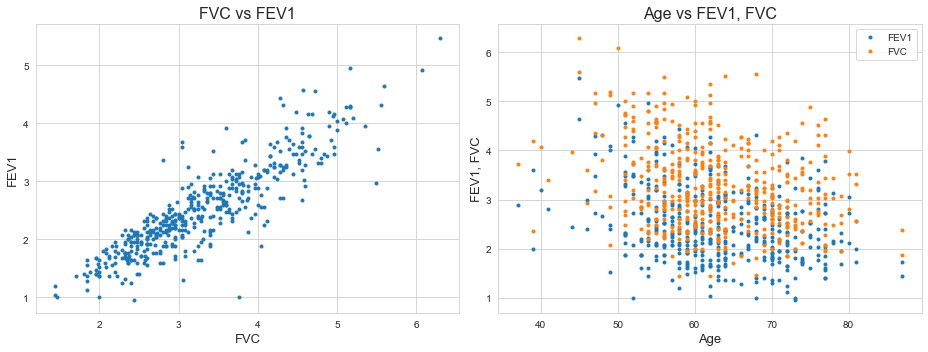

In [35]:
# Scatter plot for FVC, FEV1, Age columns

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(df.FVC, df.FEV1, linestyle='none', marker='.')

axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

axes[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')
axes[1].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1, FVC', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs FEV1, FVC', fontsize=16)

plt.tight_layout()

In [36]:
# Correlation coefficients for FVC and FEV1
np.corrcoef(df.FVC, df.FEV1)[0,1]

0.8875452733828997

In [37]:
# Correlation coefficients for Age and FVC
np.corrcoef(df.Age, df.FVC)[0,1]

-0.29942991966049093

In [38]:
# Correlation coefficients for Age and FEV1
np.corrcoef(df.Age, df.FEV1)[0,1]

-0.30961662730798906

In [39]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""    
    n = len(data)    
    x = np.sort(data)    
    y = np.arange(1, n+1) / n    
    return x, y

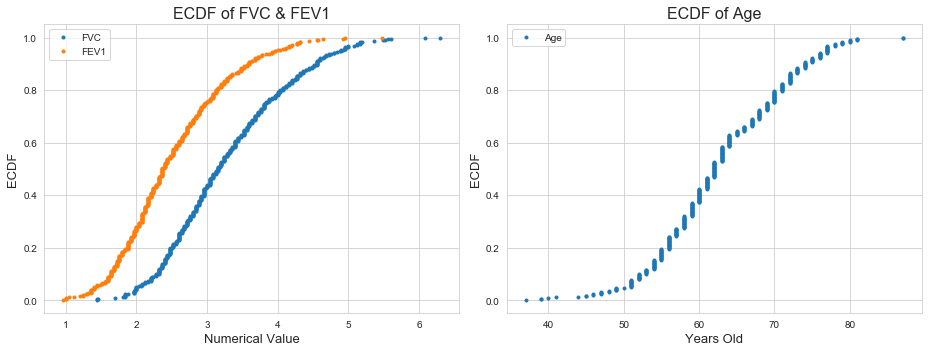

In [40]:
# ECDF of FVC, FEV1, Age
x_fvc, y_fvc = ecdf(df.FVC)
x_fev1, y_fev1 = ecdf(df.FEV1)
x_age, y_age = ecdf(df.Age)

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(x_fvc, y_fvc, marker='.', linestyle='none', label='FVC')
axes[0].plot(x_fev1, y_fev1, marker='.', linestyle='none', label='FEV1')

axes[0].set_xlabel('Numerical Value', fontsize=13)
axes[0].set_ylabel('ECDF', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].set_title('ECDF of FVC & FEV1', fontsize=16)

axes[1].plot(x_age, y_age, marker='.', linestyle='none', label='Age')
axes[1].set_xlabel('Years Old', fontsize=13)
axes[1].set_ylabel('ECDF', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].set_title('ECDF of Age', fontsize=16)

plt.tight_layout()

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import itertools

In [42]:
# All attributes excluding target variable, Asthma, and MI_6mo
X = df.drop(['Death_1yr', 'MI_6mo', 'Asthma'], axis=1)

# Attributes of Significance from Hypothesis Testing
X2 = df[['Performance', 'Dyspnoea', 'Cough', 'Tumor_Size', 'Diabetes_Mellitus']]
y = df['Death_1yr']

In [43]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [44]:
def model_report(model, X, y, title, weight=None):
    """Takes in classifier model with X data and class weight to display scores and confusion matrix."""

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1111, stratify=y)
    
    clf = model(class_weight=weight, random_state=1111)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    class_names = ['Live', 'Death']
    
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred, target_names=class_names))

    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
      
    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title=title)
    plt.show()

In [45]:
def class_weights_plot(model, title):
    """Plots accuracy, average precision, and correct death predictions of different class weights for X2 data."""
    class_weights = [1,2,3,4,5,6,7,8,9,10]
    acc_scores = []
    prec_scores = []
    correct_deaths = []

    for cw in class_weights:
        clf = model(class_weight={0: 1, 1: cw}, random_state=1111)
        predicted = cross_val_predict(clf, X2, y, cv=5)

        acc_scores.append(accuracy_score(y, predicted))
        prec_scores.append(average_precision_score(y, predicted))
        correct_deaths.append(confusion_matrix(y, predicted)[1,1]/68)
    
    plt.figure(figsize=(8,6))
    plt.plot(class_weights, acc_scores, marker='.', label='Accuracy Score')
    plt.plot(class_weights, prec_scores, marker='.', label='Average Precision')
    plt.plot(class_weights, correct_deaths, marker='.', label='Correct Death Predictions')
    plt.xticks(class_weights)
    plt.xlabel('Class Weights', fontsize=13)
    plt.ylabel('Scores', fontsize=13)
    plt.legend()
    plt.title(title, fontsize=16)

    plt.show()

In [46]:
def class_weights_tf_plot(model, title):
    """Plots confusion matrix values of different class weights for X2 data."""
    class_weights = [1,2,3,4,5,6,7,8,9,10]
    true_live = []
    false_live = []
    true_death = []
    false_death = []

    for cw in class_weights:
        clf = model(class_weight={0: 1, 1: cw}, random_state=1111)
        predicted = cross_val_predict(clf, X2, y, cv=5)
        
        true_live.append(confusion_matrix(y, predicted)[0,0]/385)
        false_live.append(confusion_matrix(y, predicted)[1,0]/68)
        true_death.append(confusion_matrix(y, predicted)[1,1]/68)
        false_death.append(confusion_matrix(y, predicted)[0,1]/385)
    
    plt.figure(figsize=(8,6))
    plt.plot(class_weights, true_live, marker='.', label='Correct Live Predictions')
    plt.plot(class_weights, false_live, marker='.', label='False Live Predictions')
    plt.plot(class_weights, true_death, marker='.', label='Correct Death Predictions')
    plt.plot(class_weights, false_death, marker='.', label='False Death Predictions')
    plt.xticks(class_weights)
    plt.xlabel('Class Weights', fontsize=13)
    plt.ylabel('Scores', fontsize=13)
    plt.legend()
    plt.title(title, fontsize=16)

    plt.show()

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.85
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.85      1.00      0.92       116
       Death       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


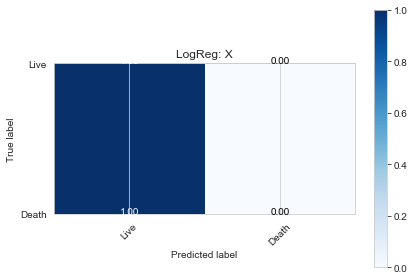

In [47]:
# Log Reg on X with no class weights
model_report(LogisticRegression, X, y,'LogReg: X')

In [48]:
#Support Vector Machine Algorithm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1111, stratify=y)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

class_names = ['Live', 'Death']
    
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=class_names))




0.8467153284671532
Accuracy: 0.85
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.85      1.00      0.92       116
       Death       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137



C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1111, stratify=y)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

class_names = ['Live', 'Death']
    
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=class_names))

0.7299270072992701
Accuracy: 0.73
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.84      0.84      0.84       116
       Death       0.14      0.14      0.14        21

    accuracy                           0.73       137
   macro avg       0.49      0.49      0.49       137
weighted avg       0.74      0.73      0.73       137



In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

class_names = ['Live', 'Death']
    
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=class_names))

0.7299270072992701
Accuracy: 0.73
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.84      0.84      0.84       116
       Death       0.14      0.14      0.14        21

    accuracy                           0.73       137
   macro avg       0.49      0.49      0.49       137
weighted avg       0.74      0.73      0.73       137



In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

class_names = ['Live', 'Death']
    
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=class_names))

0.7299270072992701
Accuracy: 0.73
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.84      0.84      0.84       116
       Death       0.14      0.14      0.14        21

    accuracy                           0.73       137
   macro avg       0.49      0.49      0.49       137
weighted avg       0.74      0.73      0.73       137



C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.65
Average Precision: 0.18
              precision    recall  f1-score   support

        Live       0.88      0.68      0.77       116
       Death       0.21      0.48      0.29        21

    accuracy                           0.65       137
   macro avg       0.55      0.58      0.53       137
weighted avg       0.78      0.65      0.69       137

Normalized confusion matrix
[[0.68 0.32]
 [0.52 0.48]]


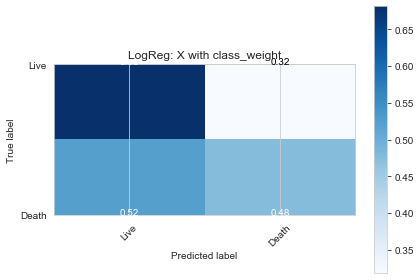

In [52]:
# Log Reg on X with class weight balanced since imbalanced death numbers (15%)
model_report(LogisticRegression, X, y,'LogReg: X with class_weight','balanced')

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.85
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.85      1.00      0.92       116
       Death       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


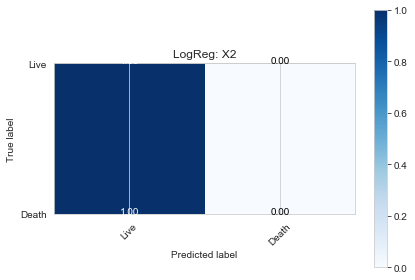

In [53]:
# X2 log reg with no class weights
model_report(LogisticRegression, X2, y,'LogReg: X2')

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.57
Average Precision: 0.20
              precision    recall  f1-score   support

        Live       0.91      0.54      0.68       116
       Death       0.22      0.71      0.34        21

    accuracy                           0.57       137
   macro avg       0.57      0.63      0.51       137
weighted avg       0.81      0.57      0.63       137

Normalized confusion matrix
[[0.54 0.46]
 [0.29 0.71]]


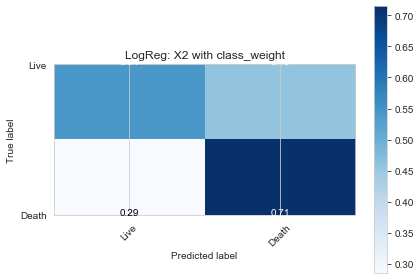

In [54]:
# X2 log reg with class weight balanced
model_report(LogisticRegression, X2, y,'LogReg: X2 with class_weight','balanced')

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

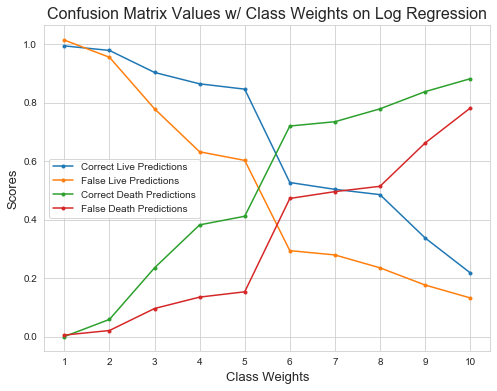

In [55]:
# Plot different class weights influence on Log Reg X2
class_weights_tf_plot(LogisticRegression, 'Confusion Matrix Values w/ Class Weights on Log Regression')

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

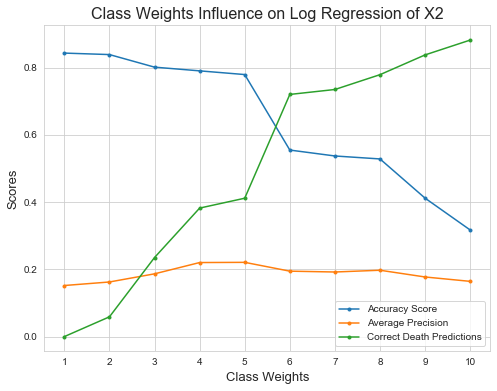

In [56]:
# Plot different class weights influence on LogReg X2
class_weights_plot(LogisticRegression, 'Class Weights Influence on Log Regression of X2')

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.83
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.84      0.98      0.91       116
       Death       0.00      0.00      0.00        21

    accuracy                           0.83       137
   macro avg       0.42      0.49      0.45       137
weighted avg       0.72      0.83      0.77       137

Normalized confusion matrix
[[0.98 0.02]
 [1.   0.  ]]


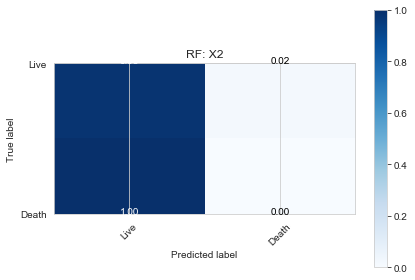

In [57]:
# X2 Random Forest Classifier with equal class weights 1:1
model_report(RandomForestClassifier, X2, y,'RF: X2')

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.54
Average Precision: 0.14
              precision    recall  f1-score   support

        Live       0.82      0.59      0.68       116
       Death       0.11      0.29      0.16        21

    accuracy                           0.54       137
   macro avg       0.47      0.44      0.42       137
weighted avg       0.71      0.54      0.60       137

Normalized confusion matrix
[[0.59 0.41]
 [0.71 0.29]]


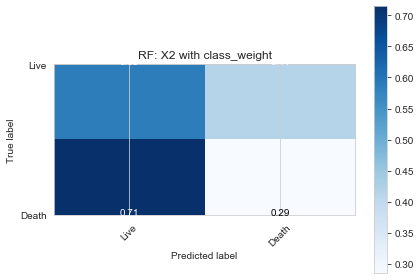

In [58]:
# X2 Random Forest Classifier with class weight 5.67
model_report(RandomForestClassifier, X2, y, 'RF: X2 with class_weight','balanced')

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

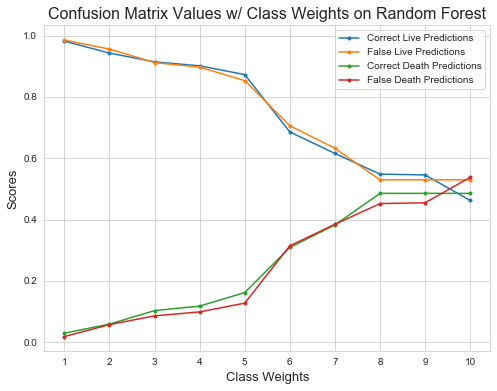

In [59]:
# Plot different class weights influence on RF classifier
class_weights_tf_plot(RandomForestClassifier, 'Confusion Matrix Values w/ Class Weights on Random Forest')

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Krunal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

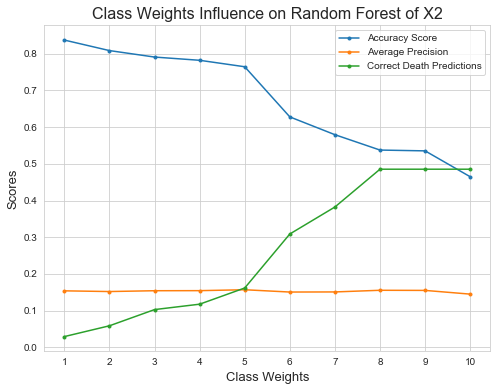

In [60]:
# Plot different class weights influence on RF classifier
class_weights_plot(RandomForestClassifier, 'Class Weights Influence on Random Forest of X2')


In [ ]:
# Grid Search Hyperparameters for Random Forest
rfc = RandomForestClassifier(random_state=1111) 

param_grid = {
           "n_estimators" : [5, 6, 7, 8, 9],
           "max_depth" : [7, 8, 9, 10],
           "min_samples_leaf" : [7, 8, 9, 10],
           "class_weight": [None, 'balanced', {0: 1, 1: 5}]}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='average_precision')
CV_rfc.fit(X2, y)
print(CV_rfc.best_params_)
print('Best average precision score: {:.4f}'.format(CV_rfc.best_score_))